# Diabetes Prediction

 Given the  data in diabetes.csv I will try to predict whether a person is diabetic or not based in the data. I will be using a supervised classification model since the use case only wants two classes based on the given data. The data has a label data which means that my model that i will be using to solve this problem must belong to the supervised learning group between Regression and Classification, fortunately the use case requires two classes then i will use classification. To determine which classification model will best suit the use case i will have to study the data first and get some insights on which features are more important for prediction and aonly after then i will know which model to use based on how the features are.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

### Import Dataset

In [2]:
df = pd.read_csv('Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data analysis

In [3]:
# Check the shape of the datasset
df.shape

(768, 9)

In [4]:
# check if there are any null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# check the name of the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# check the datatypes of the columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#check the tail of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# get the statistical details of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Split the data into X matrix of features and target feature

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
X.shape

(768, 8)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

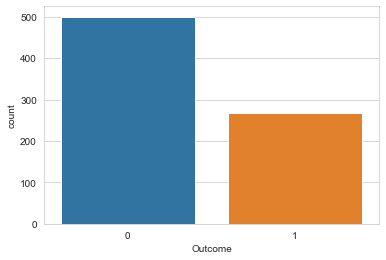

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)

### Split data into Train and Test Set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Build the Model

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Check how well it trains based on the given data

In [15]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score( y_train, y_train_pred)

[[324  46]
 [ 90 116]]


0.7638888888888888

### Predict the values of the Test Set and check how correct the predictions are

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

### Compute Confusion Matrix to check accuracy

In [17]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score( y_test, y_pred)

[[117  13]
 [ 25  37]]


0.8020833333333334

### Apply K-Fold Validation

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.04 %
Standard Deviation: 4.28 %


### Apply Grid Search to find the best hyper parameters

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 76.38 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


The model is underfitting when it comes to performing in an unseen data due to the fact that the number of features of this dataset are small so it does not have enough data to train properly so it can at least perform with a 90% and above. To fix this I will need to get more  features and apply some feature engineering to the dataset and see which columns are not effective or have no effect in a person  being diabetic or not.

### Testing one individual

In [20]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


# prediction using the model
prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0]==0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[1]
The person is diabetic


In [21]:
# saving the model
import pickle

In [22]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [23]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [24]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


# prediction using the model
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction[0]==0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
